In [ ]:
from google.colab import files
uploaded = files.upload()


Saving German_Credit_Card_Dataset.csv to German_Credit_Card_Dataset (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv("/content/German_Credit_Card_Dataset.csv")
df.info()
df.shape
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [ ]:
df.iloc[0:5,0:7]

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate
0,A11,6,A34,1169,A65,A75,4
1,A12,48,A32,5951,A61,A73,2
2,A14,12,A34,2096,A61,A74,2
3,A11,42,A32,7882,A61,A74,2
4,A11,24,A33,4870,A61,A73,3


In [ ]:
df.iloc[0:5,7:]

,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A93,4,67,A143,2,A173,0
1,A92,2,22,A143,1,A173,1
2,A93,3,49,A143,1,A172,0
3,A93,4,45,A143,1,A173,0
4,A93,4,53,A143,2,A173,1


In [ ]:
df['status']

,status
0,0
1,1
2,0
3,0
4,1
...,...
995,0
996,0
997,0
998,1


In [ ]:
df['checkin_acc'].unique()

array(['A11', 'A12', 'A14', 'A13'], dtype=object)

In [ ]:
x_features = list(df.columns)
x_features.remove('status')
encoded_df = pd.get_dummies(df[x_features],drop_first=True)
print(list(encoded_df.columns))

['duration', 'amount', 'inst_rate', 'residing_since', 'age', 'num_credits', 'checkin_acc_A12', 'checkin_acc_A13', 'checkin_acc_A14', 'credit_history_A31', 'credit_history_A32', 'credit_history_A33', 'credit_history_A34', 'savings_acc_A62', 'savings_acc_A63', 'savings_acc_A64', 'savings_acc_A65', 'present_emp_since_A72', 'present_emp_since_A73', 'present_emp_since_A74', 'present_emp_since_A75', 'personal_status_A92', 'personal_status_A93', 'personal_status_A94', 'inst_plans_A142', 'inst_plans_A143', 'job_A172', 'job_A173', 'job_A174']


In [ ]:
x=encoded_df
y=df['status']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier (criterion= 'gini', max_depth=3)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
pred_y = clf.predict(x_test)

In [ ]:
from sklearn import metrics
print("Confusion Matrix is \n",metrics.confusion_matrix(pred_y,y_test))
print("Accuracy is \n",metrics.accuracy_score(pred_y,y_test))
print("AUC score is",metrics.roc_auc_score(pred_y,y_test))

Confusion Matrix is 
 [[198  71]
 [ 11  20]]
Accuracy is 
 0.7266666666666667
AUC score is 0.6906103849382419


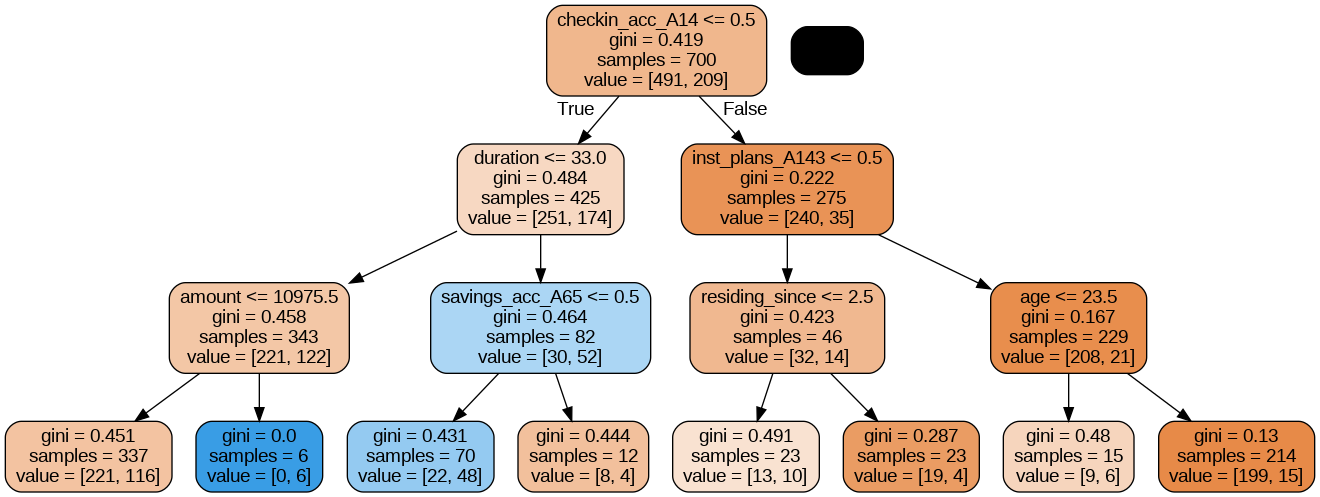

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image
export_graphviz(clf,out_file='tree.dot',feature_names=x_train.columns,filled=True,rounded=True)
graph = pdot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')
Image(filename='tree.png')
